# Pymaceuticals Inc.
---

### Analysis

- 1:So, we’ve found an interesting link between the weight of a mouse and the average size of its tumors when we use Capomulin. But let’s not jump to conclusions! This doesn’t necessarily mean one causes the other—there are lots of other things at play here.

2: Looking at our findings, it seems like Ramicane is doing a pretty good job! The mice treated with it had the smallest average and middle-range tumor sizes compared to the others. It seems to be the standout in this sample of ours!

3: Now, when comparing our four different treatments—Capomulin, Ramicane, Infubinol, and Ceftamin—it’s looking like Capomulin and Ramicane are pulling ahead. The mice we treated with them ended up with much smaller final tumor sizes than the ones treated with the other two drugs.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on=["Mouse ID"])

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# combined_df.drop_duplicates(subset = "Timepoint")
combined_df_rename = combined_df.rename(columns={'Mouse ID':'Mouse_ID'})
values = ["g989"]
clean_data_df = combined_df_rename[combined_df_rename.Mouse_ID.isin(values) == False]
clean_data_df

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
Mice_Number_New = clean_data_df["Mouse_ID"].nunique()
Mice_Number_New

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volume_mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_median = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_st = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_sem = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mean_df = pd.DataFrame(volume_mean)
median_df = pd.DataFrame(volume_median)
st_df = pd.DataFrame(volume_st)
sem_df = pd.DataFrame(volume_sem)

# Assemble the resulting series into a single summary DataFrame.
mean_median = pd.merge(mean_df, median_df, how="outer", on=["Drug Regimen"])
mean_median_st = pd.merge(mean_median, st_df, how="outer", on=["Drug Regimen"])
Volume_Summary_1 = mean_median_st.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Mean',
                                                'Tumor Volume (mm3)_y': 'Tumor Volume Median',
                                               'Tumor Volume (mm3)':'Tumor Volume Standard Deviation'})
Volume_Summary_2 = pd.merge(Volume_Summary_1, sem_df, how="outer", on=["Drug Regimen"])
Volume_Summary = Volume_Summary_2.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'})
Volume_Summary["Tumor Volume Variance"] = Volume_Summary["Tumor Volume Standard Deviation"]**2
Volume_Summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume SEM,Tumor Volume Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

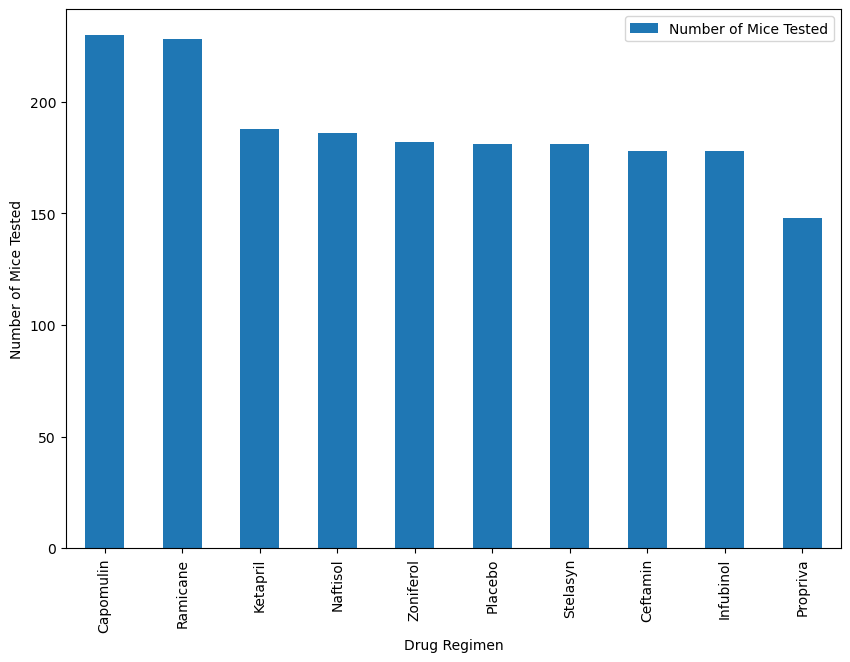

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_df = clean_data_df.groupby("Drug Regimen").count()
timepoints_number = pd.DataFrame(drug_regimen_df["Mouse_ID"])
timepoints_summary = timepoints_number.rename(columns={'Mouse_ID':'Number of Mice Tested'}) 
timepoints_sorted = timepoints_summary.sort_values('Number of Mice Tested', ascending=False)
timepoints_sorted.plot(kind="bar", figsize=(10,7))
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

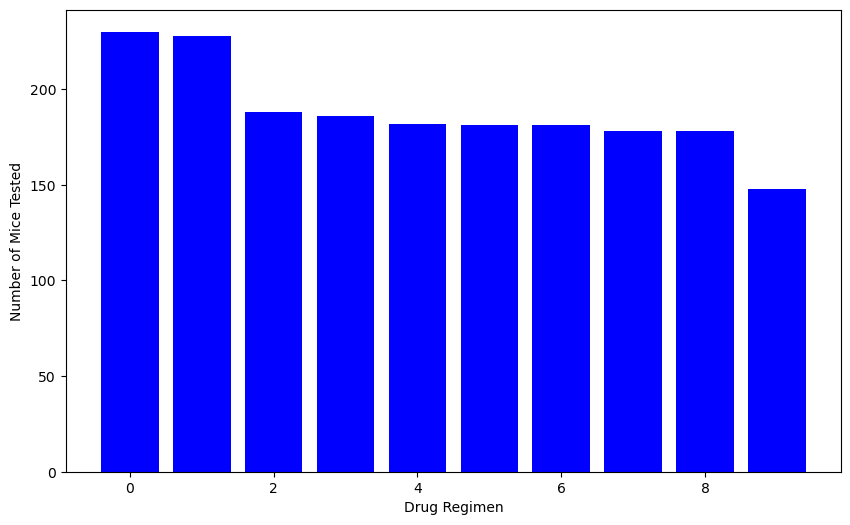

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints_sorted))
# drug_reg = [value for value in x_axis]
# y_axis = timepoints_sorted["Number of Mice Tested"]
plt.figure(figsize=(10,6))
plt.bar(x_axis, timepoints_sorted["Number of Mice Tested"], color='blue', alpha=1, align="center")
# plt.xticks(drug_reg, timepoints_sorted[0], rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Sex')

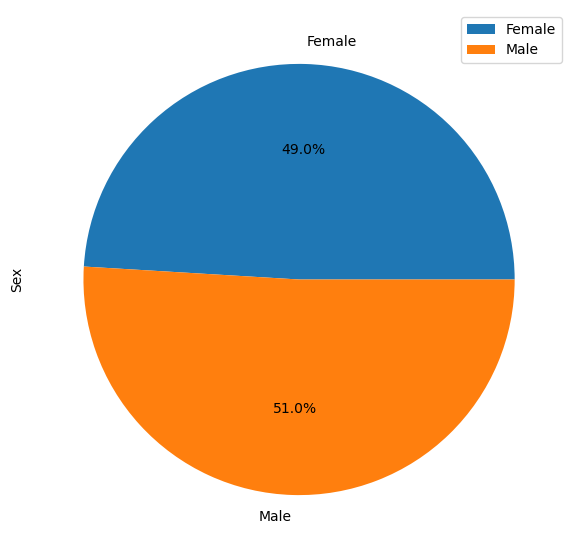

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_data_df.groupby("Sex").count()
sex_ratio_df = pd.DataFrame(sex_df["Mouse_ID"])
sex_summary = sex_ratio_df.rename(columns={'Mouse_ID':'Number of Mice'}) 
sex_pie = sex_summary.plot(kind="pie", y='Number of Mice', autopct='%1.1f%%', figsize = (11,7))
sex_pie.set_ylabel("Sex")

([<matplotlib.patches.Wedge at 0x15eb050c0>,
 [Text(-0.10688209975242623, -1.8669430137935417, 'Male'),
  Text(0.10688209975242645, 1.8669430137935417, 'Female')],
 [Text(-0.058299327137687026, -1.0183325529782954, '51.0%'),
  Text(0.05829932713768715, 1.0183325529782954, '49.0%')])

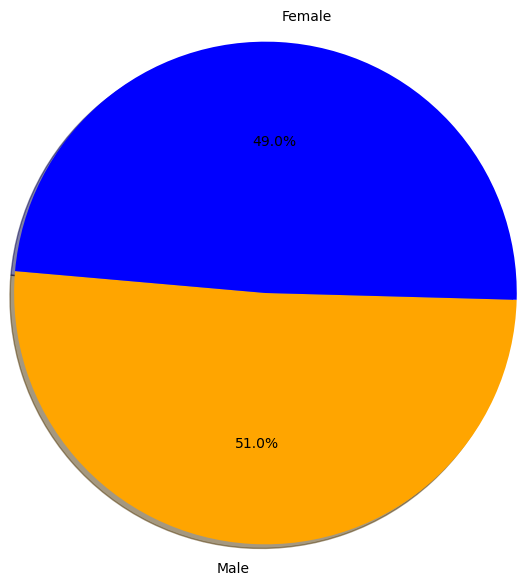

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["orange", "blue"]

sex_summary

plt.pie(sizes, labels=labels, radius=1.7, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tp_ID = clean_data_df.groupby(clean_data_df["Mouse_ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_df = pd.merge(clean_data_df, tp_ID, how="outer", on=["Mouse_ID"])
Merged_df_rename = Merged_df.rename(columns={'Timepoint_y':'Max Timepoint'}) 
Merged_df_rename

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regiment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in regiment_list:   
    tumor_vol_regimen = Merged_df_rename.loc[Merged_df_rename["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_vol_df.append(tumor_vol_regimen)
    quartiles = tumor_vol_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_regimen.loc[(tumor_vol_regimen < lower_bound)&(tumor_vol_regimen > upper_bound)]
    print(f"The lower quartile of {x}  is: {lowerq}")
    print(f"The upper quartile of {x}  is: {upperq}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin  is: 37.685932865
The upper quartile of Capomulin  is: 45.0
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
The lower quartile of Ramicane  is: 36.674634585
The upper quartile of Ramicane  is: 45.0
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
The lower quartile of Infubinol  is: 47.3123533
The upper quartile of Infubinol  is: 57.314443967500004
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
The lower quartile of Ceftamin  is: 47.2084271125
The upper quartile of Ceftamin  is: 56.801437570000004
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

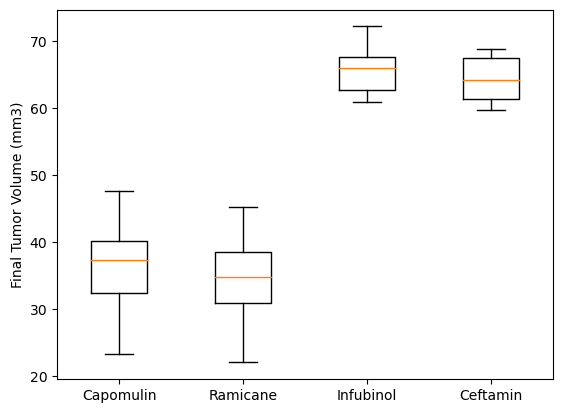

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_vol_df = Merged_df_rename.loc[Merged_df_rename["Timepoint_x"] == Merged_df_rename["Max Timepoint"]]
Capomulin_vol_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Capomulin"]
Ramicane_vol_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Ramicane"]
Infubinol_vol_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Infubinol"]
Ceftamin_vol_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Ceftamin"]

Capo_vol = Capomulin_vol_df.loc[Capomulin_vol_df["Max Timepoint"] == 45, 'Tumor Volume (mm3)'].values
Rami_vol = Ramicane_vol_df.loc[Ramicane_vol_df["Max Timepoint"] == 45, 'Tumor Volume (mm3)'].values
Infu_vol = Infubinol_vol_df.loc[Infubinol_vol_df["Max Timepoint"] == 45, 'Tumor Volume (mm3)'].values
Ceft_vol = Ceftamin_vol_df.loc[Ceftamin_vol_df["Max Timepoint"] == 45, 'Tumor Volume (mm3)'].values

plt.boxplot([Capo_vol, Rami_vol, Infu_vol, Ceft_vol], labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

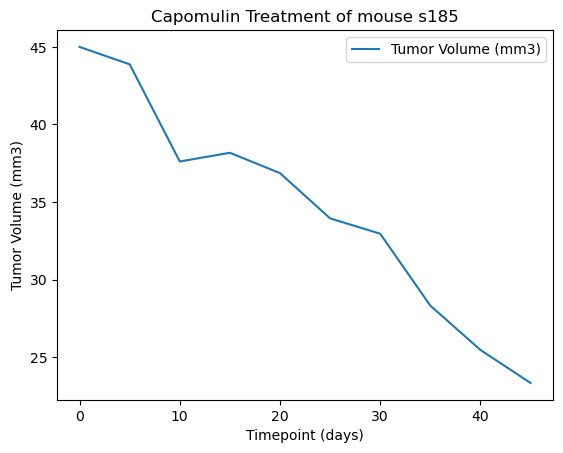

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_mouse = clean_data_df.loc[(combined_df['Drug Regimen'] =='Capomulin')]
Capomulin_mouse
mouse_s185 = Capomulin_mouse.loc[(Capomulin_mouse['Mouse_ID'] =='s185')]
mouse_s185.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volumt (mm3)')

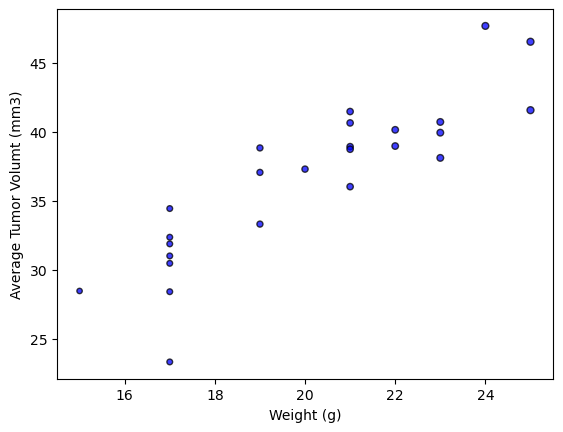

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_axis = Capomulin_vol_df["Weight (g)"]
plt.scatter(x_axis, Capomulin_vol_df["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumt (mm3)")

## Correlation and Regression

The correlation between the two factors is 0.88


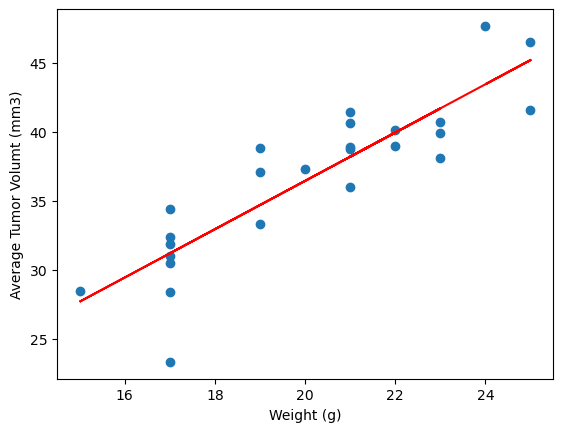

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = Capomulin_vol_df["Weight (g)"]
average_volume = Capomulin_vol_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,average_volume)
print(f"The correlation between the two factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, average_volume)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(7,1.2),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumt (mm3)")
plt.show()